**CICIDS2017**  dataset contains benign and the most up-to-date common attacks, which resembles the true real-world data (PCAPs). It also includes the results of the network traffic analysis using CICFlowMeter with labeled flows based on the time stamp, source, and destination IPs, source and destination ports, protocols and attack (CSV files). Also available is the extracted features definition. 


Dataset link :-
1. https://www.unb.ca/cic/datasets/ids-2017.html
2. https://github.com/mahendradata/cicids2017-ml

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt  # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
# Mount Google Drive
#from google.colab import drive
#drive.mount("/content/drive")

# DataSet


In [ ]:
for dirname, _, filenames in os.walk('/content/CIC/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/CIC/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
/content/CIC/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
/content/CIC/Tuesday-WorkingHours.pcap_ISCX.csv
/content/CIC/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
/content/CIC/Wednesday-workingHours.pcap_ISCX.csv
/content/CIC/Monday-WorkingHours.pcap_ISCX.csv
/content/CIC/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
/content/CIC/Friday-WorkingHours-Morning.pcap_ISCX.csv


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nRowsRead = None 

df1=pd.read_csv("/content/CIC/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("/content/CIC/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("/content/CIC/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("/content/CIC/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("/content/CIC/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("/content/CIC/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("/content/CIC/Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("/content/CIC/Wednesday-workingHours.pcap_ISCX.csv")


In [ ]:
df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8

nRow, nCol = df.shape

In [ ]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0.0,0.0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,666666.666700,0.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,33.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6.0,6.0,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109.0,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,9174.311927,9174.311927,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6.0,6.0,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,19230.769230,19230.769230,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6.0,6.0,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,29411.764710,29411.764710,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,31.0,329.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0.0,0.0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,666666.666700,0.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,32.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77493 entries, 0 to 8998
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Destination Port             77493 non-null  int64  
 1    Flow Duration                77493 non-null  int64  
 2    Total Fwd Packets            77493 non-null  int64  
 3    Total Backward Packets       77493 non-null  int64  
 4   Total Length of Fwd Packets   77493 non-null  int64  
 5    Total Length of Bwd Packets  77493 non-null  int64  
 6    Fwd Packet Length Max        77493 non-null  int64  
 7    Fwd Packet Length Min        77493 non-null  int64  
 8    Fwd Packet Length Mean       77492 non-null  float64
 9    Fwd Packet Length Std        77492 non-null  float64
 10  Bwd Packet Length Max         77492 non-null  float64
 11   Bwd Packet Length Min        77492 non-null  float64
 12   Bwd Packet Length Mean       77492 non-null  float64
 13   B

In [ ]:
#Combine All Dataset
#DIR_PATH = "CIC"

#FILE_NAMES =["Monday-WorkingHours.pcap_ISCX.csv",
#              "Tuesday-WorkingHours.pcap_ISCX.csv",
#             "Wednesday-workingHours.pcap_ISCX.csv",
#              "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
#              "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
#              "Friday-WorkingHours-Morning.pcap_ISCX.csv",
#              "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
#              "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"]

In [ ]:
#df = [pd.read_csv(os.path.join(DIR_PATH, f), skipinitialspace=True) for f in FILE_NAMES]
#df = pd.concat(df, ignore_index=True)

In [ ]:
#df.Label.value_counts()

BENIGN           77477
PortScan             7
DoS slowloris        1
Name: Label, dtype: int64

# Functions for graphs

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] #For displaying purposes, i will  pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


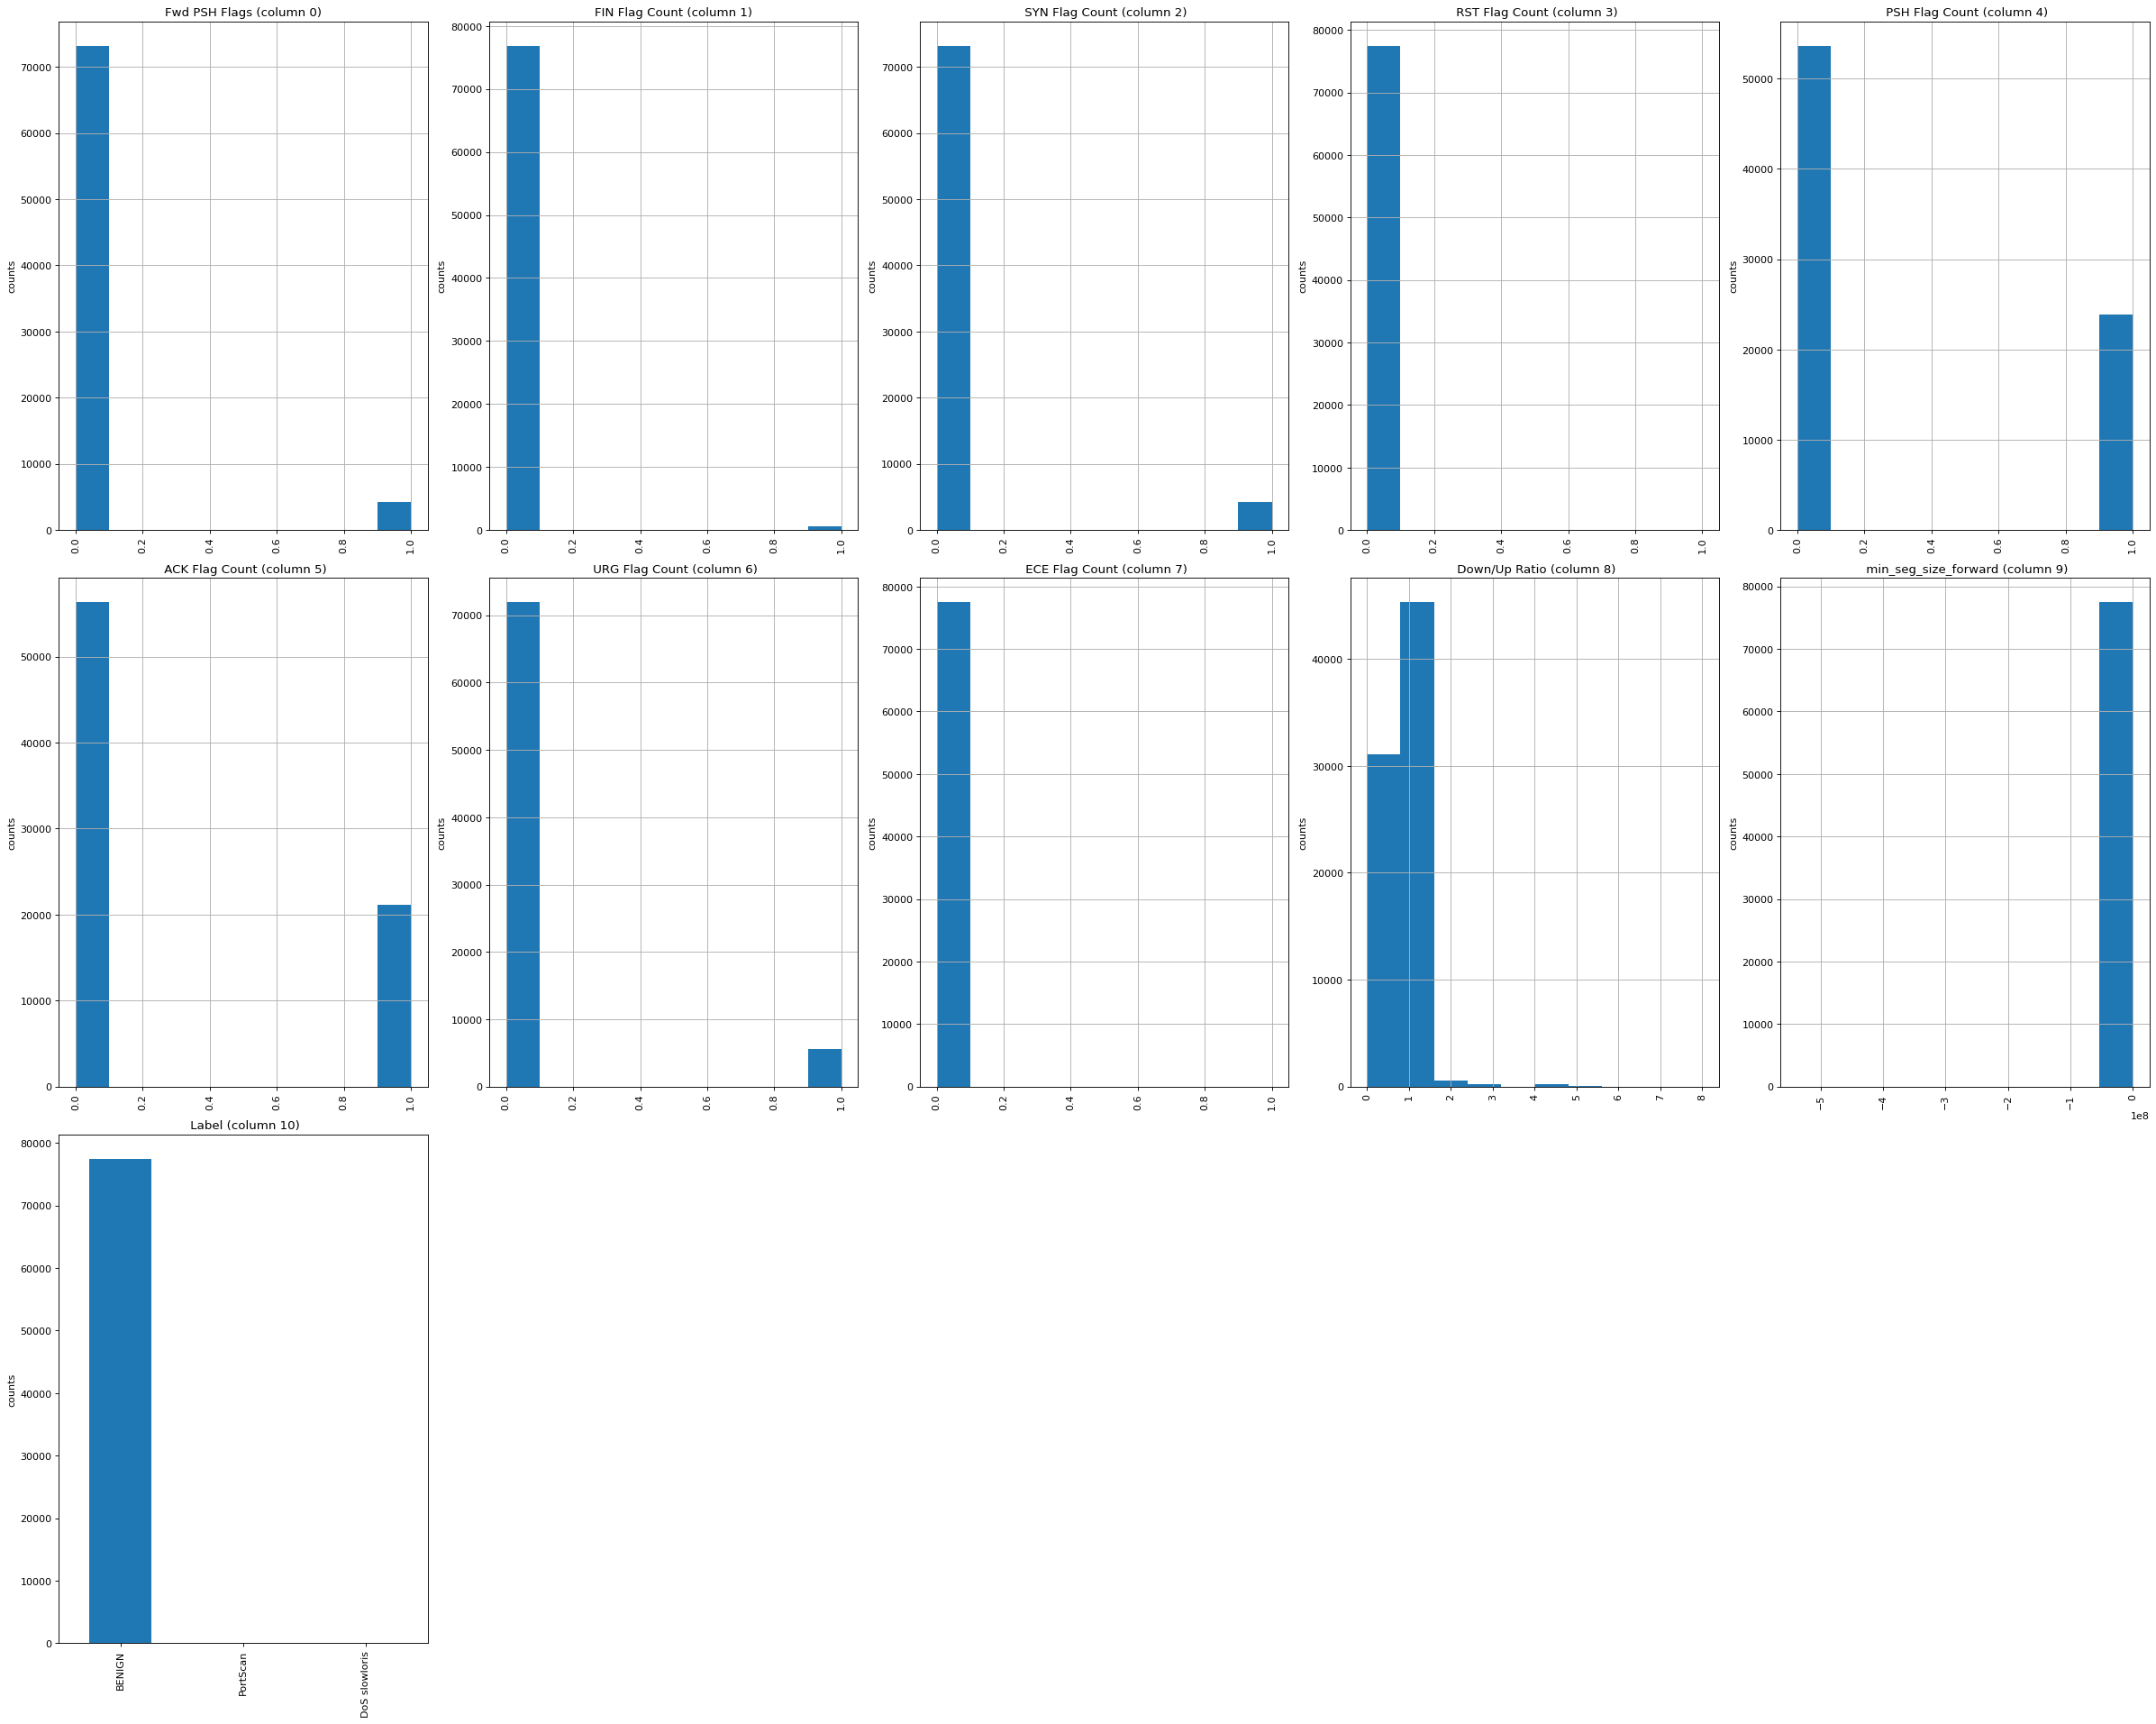

In [ ]:
plotPerColumnDistribution(df, 79, 5)

# Classification

Data preprocess

In [ ]:
#Split dataset on train and test
from sklearn.model_selection import train_test_split
train, test=train_test_split(df,test_size=0.3, random_state=10)

In [ ]:
#Exploratory Analysis
# Descriptive statistics
train.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,54245.000000,5.424500e+04,54245.000000,54245.000000,5.424500e+04,5.424500e+04,54245.000000,54245.000000,54244.000000,54244.000000,54244.000000,54244.000000,54244.000000,54244.000000,5.422900e+04,5.424400e+04,5.424400e+04,5.424400e+04,5.424300e+04,5.424300e+04,5.424300e+04,5.424300e+04,5.424200e+04,5.424200e+04,5.424200e+04,5.424200e+04,5.424200e+04,5.424200e+04,5.424200e+04,5.424200e+04,54242.000000,54242.0,54242.0,54242.0,5.424200e+04,5.424200e+04,5.424200e+04,5.424200e+04,54242.000000,54242.000000,54242.000000,54242.000000,5.424200e+04,54242.000000,54242.000000,54242.000000,54242.000000,54242.000000,54242.000000,54242.0,54242.000000,54242.000000,54242.000000,54242.000000,54242.000000,5.424200e+04,54242.0,54242.0,54242.0,54242.0,54242.0,54242.0,54242.000000,5.424200e+04,54242.000000,5.424200e+04,54242.000000,54242.000000,54242.000000,5.424200e+04,5.424200e+04,5.424200e+04,5.424200e+04,5.424100e+04,5.424100e+04,5.424100e+04,5.424100e+04,5.424100e+04
mean,6474.265536,1.689217e+07,51.450124,64.660116,1.067664e+03,1.325239e+05,235.474606,21.603447,61.295612,70.163066,546.399583,47.095089,204.384860,174.744361,inf,inf,1.413117e+06,2.697127e+06,7.066546e+06,6.752123e+04,1.649396e+07,3.383318e+06,1.703629e+06,6.864331e+06,2.354910e+06,1.520493e+07,3.331638e+06,1.278755e+06,5.836642e+06,2.443102e+06,0.055935,0.0,0.0,0.0,-9.830732e+05,-5.834420e+04,5.912772e+04,5.097783e+03,20.654898,605.833266,128.392281,174.854916,1.149984e+05,0.007577,0.055935,0.000221,0.308838,0.273165,0.072140,0.0,0.000221,0.622672,143.141188,61.293416,204.388114,-9.830732e+05,0.0,0.0,0.0,0.0,0.0,0.0,51.452804,1.067708e+03,64.663545,1.325093e+05,7235.231850,2250.105822,44.128295,-7.266124e+04,1.484844e+05,8.647830e+04,3.003152e+05,9.968360e+04,5.943789e+06,2.424710e+05,6.131286e+06,5.704432e+06
std,16337.339500,3.532023e+07,2739.687711,3639.701860,1.708960e+04,8.008193e+06,715.373860,50.090688,142.658094,199.251258,976.927558,81.580733,340.036853,320.624108,NaN,NaN,4.653391e+06,7.887233e+06,1.785789e+07,1.692034e+06,3.518684e+07,1.268144e+07,5.063174e+06,1.777770e+07,1.253239e+07,3.416963e+07,1.285714e+07,4.394205e+06,1.653034e+07,1.270177e+07,0.229797,0.0,0.0,0.0,1.463385e+08,6.687178e+06,2.427045e+05,3.810208e+04,36.223957,1143.371447,199.904717,290.559327,3.750605e+05,0.086717,0.229797,0.014872,0.462018,0.445589,0.258721,0.0,0.014872,0.560597,206.447161,142.659246,340.042696,1.463385e+08,0.0,0.0,0.0,0.0,0.0,0.0,2739.763450,1.709008e+04,3639.802483,8.007016e+06,13900.433604,9084.683413,2622.534306,5.339483e+06,1.019745e+06,5.794533e+05,1.569099e+06,9.291802e+05,1.645689e+07,2.442125e+06,1.685147e+07,1.627530e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.0000

In [ ]:
test.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,23248.000000,2.324800e+04,23248.000000,23248.000000,2.324800e+04,2.324800e+04,23248.000000,23248.000000,23248.000000,23248.000000,23248.000000,23248.000000,23248.000000,23248.000000,2.324500e+04,2.324800e+04,2.324800e+04,2.324800e+04,2.324800e+04,2.324800e+04,2.324800e+04,2.324800e+04,2.324700e+04,2.324700e+04,2.324700e+04,2.324700e+04,2.324700e+04,2.324700e+04,2.324700e+04,2.324700e+04,23247.000000,23247.0,23246.0,23246.0,2.324600e+04,2.324600e+04,2.324600e+04,2.324500e+04,23245.000000,23245.000000,23245.000000,23245.000000,2.324500e+04,23245.000000,23245.00000,23245.000000,23245.000000,23245.000000,23245.000000,23245.0,23245.000000,23245.000000,23245.000000,23245.000000,23245.000000,2.324400e+04,23244.0,23244.0,23244.0,23244.0,23244.0,23244.0,23244.000000,2.324400e+04,23244.000000,2.324400e+04,23244.000000,23244.000000,23244.000000,2.324400e+04,2.324400e+04,2.324400e+04,2.324400e+04,2.324400e+04,2.324400e+04,2.324400e+04,2.324400e+04,2.324400e+04
mean,6474.757269,1.654581e+07,66.810005,85.337233,1.187470e+03,1.775952e+05,242.656788,21.848159,62.004819,71.052266,542.462405,48.071576,205.967465,172.386220,inf,inf,1.441770e+06,2.734752e+06,7.092199e+06,6.909878e+04,1.616267e+07,3.482408e+06,1.665815e+06,6.889713e+06,2.470931e+06,1.466482e+07,3.392781e+06,1.206913e+06,5.710784e+06,2.542808e+06,0.054416,0.0,0.0,0.0,-2.742660e+04,-2.711437e+04,6.022456e+04,5.199415e+03,20.929146,608.335298,129.588317,174.882172,1.164277e+05,0.009464,0.05442,0.000258,0.305141,0.273048,0.070768,0.0,0.000258,0.624995,144.579160,62.004959,205.963945,-2.742896e+04,0.0,0.0,0.0,0.0,0.0,0.0,66.820599,1.187598e+03,85.351144,1.776324e+05,7120.419721,2311.900189,59.266262,-2.162875e+04,1.444193e+05,7.986030e+04,2.851216e+05,9.891448e+04,5.846310e+06,2.101264e+05,6.012119e+06,5.630792e+06
std,16342.092298,3.489737e+07,3093.496294,4124.325760,1.924546e+04,9.068846e+06,799.699853,51.777617,147.537497,205.787668,971.637520,86.044839,345.043671,317.142295,NaN,NaN,4.692658e+06,8.033884e+06,1.805895e+07,1.592773e+06,3.478057e+07,1.293755e+07,5.109672e+06,1.800550e+07,1.279044e+07,3.349053e+07,1.308052e+07,4.273467e+06,1.637370e+07,1.294291e+07,0.226841,0.0,0.0,0.0,1.906843e+06,1.907541e+06,2.447255e+05,3.904405e+04,37.385784,1189.073128,203.801771,293.008325,3.644973e+05,0.096826,0.22685,0.016064,0.460477,0.445535,0.256442,0.0,0.016064,0.557797,210.599433,147.546778,345.062241,1.906925e+06,0.0,0.0,0.0,0.0,0.0,0.0,3093.762363,1.924712e+04,4124.680495,9.071012e+06,13756.107464,9217.706263,2962.657945,1.347595e+06,1.100108e+06,5.714984e+05,1.611991e+06,1.021775e+06,1.639580e+07,2.186549e+06,1.672587e+07,1.624138e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e

In [ ]:
# Packet Attack Distribution
train[' Label'].value_counts()

BENIGN           54234
PortScan             6
DoS slowloris        1
Name:  Label, dtype: int64

In [ ]:
test[' Label'].value_counts()

BENIGN      23243
PortScan        1
Name:  Label, dtype: int64

In [ ]:
#Scalling numerical attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# extract numerical and scale it to have zero mean and unit variance 
cols = train.select_dtypes(include=['float32','int']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float32','int']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float32','int']))

In [ ]:
# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [ ]:
# importing one hot encoder from sklearn
from sklearn.preprocessing import OneHotEncoder 

In [ ]:
# creating one hot encoder object 
onehotencoder = OneHotEncoder() 
trainDep = train[' Label'].values.reshape(-1,1)
trainDep = onehotencoder.fit_transform(trainDep).toarray()
testDep = test[' Label'].values.reshape(-1,1)
testDep = onehotencoder.fit_transform(testDep).toarray()

In [ ]:
train_X=sc_traindf
train_y=trainDep[:,0]

test_X=sc_testdf
test_y=testDep[:,0]

Beginning of feature selection using Random Forest Classifier

In [ ]:
#Feature Selection
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

In [ ]:
# fit random forest classifier on the training set
rfc.fit(train_X, train_y);

In [ ]:
# extract important features
score = np.round(rfc.feature_importances_,5)
importances = pd.DataFrame({'feature':train_X.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

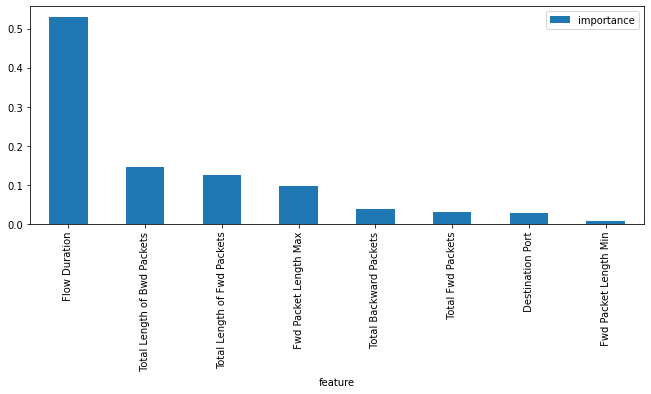

In [ ]:
# plot important features from higly important to the least important based on their impact on the results in a bar chart
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

End of feature selection with random forest classifier

Applying recursive feature elimination (RFE) method

In [ ]:
#Recursive feature elimination
from sklearn.feature_selection import RFE
import itertools

rfc = RandomForestClassifier()

In [ ]:
# we need to create the RFE model and select 20 attributes
rfe = RFE(rfc, n_features_to_select=20)
rfe = rfe.fit(train_X, train_y)

In [ ]:
rfc.fit(train_X, train_y);

In [ ]:
# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_X.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

a = [i[0] for i in feature_map]
train_X = train_X.iloc[:,a]
test_X = test_X.iloc[:,a]

In [ ]:
# plot important features from higly important to the least important based on their impact on the results in a bar chart
plt.rcParams['figure.figsize'] = (11, 4)
selected_features.reverse;

In [ ]:
#Dataset Partition
X_train,X_test,Y_train,Y_test = train_test_split(train_X,train_y,train_size=0.50, random_state=2)

# **End of phese 2 : DataSet**

# **Training Model**

Fitting Models

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Train Bagging Classifier
from sklearn.ensemble import BaggingClassifier
BG_Classifier = BaggingClassifier(n_estimators=25, random_state=2)
BG_Classifier.fit(X_train, Y_train)

BaggingClassifier(n_estimators=25, random_state=2)

In [ ]:
#Train AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
abc_Classifier = AdaBoostClassifier(n_estimators=50, random_state=2)
abc_Classifier.fit(X_train, Y_train)

AdaBoostClassifier(random_state=2)

In [ ]:
# Train Bernoulli Naive Baye Model
from sklearn.naive_bayes import BernoulliNB
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

BernoulliNB()

In [ ]:
#Train Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
#Train Multinomial Naive Bayes
from sklearn.preprocessing import MinMaxScaler  # I use MinMaxScaler to avoide the Negative values in data passed to MultinomialNB (input X)
from sklearn.naive_bayes import MultinomialNB
scaler = MinMaxScaler() # i user scaler instead of  mnb = MultinomialNB() coz it just expects non-negative input values
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)
mnb = MultinomialNB()
mnb.fit(X_train_scaled, Y_train)

MultinomialNB()

In [ ]:
#Train Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor
RFC_Classifier = RandomForestClassifier(max_depth=2, random_state=2)
RFC_Classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2, random_state=2)

In [ ]:
# Train KNeighborsClassifier Model
from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train);

In [ ]:
# Train Decision Tree Model
from sklearn import tree
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=2)
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
# Train Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
GBC_Classifier = GradientBoostingClassifier(n_estimators=50, random_state=2)
GBC_Classifier.fit(X_train, Y_train)

GradientBoostingClassifier(n_estimators=50, random_state=2)

In [ ]:
# Train LogisticRegression Model
from sklearn.linear_model import LogisticRegression
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

In [ ]:
# Train Suport Vector Classifier
from sklearn.svm import SVC
svc_Classifier = SVC(C=1.0, random_state=1, kernel='linear')
svc_Classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=1)

In [ ]:
#(kernel='sigmoid', gamma=1.0)
svc = SVC(C=1.0, random_state=1, kernel='linear') 
#Fit the model svc.fit(X_train_std, y_train)

In [ ]:
# Train Multilayer Perceptron Classifier
from sklearn.neural_network import MLPClassifier
clf_Classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(39, 30, 2), random_state=1)
clf_Classifier.fit(X_train, Y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(39, 30, 2), random_state=1,
              solver='lbfgs')

# **End of phese 3 : Training Model**

# **Evaluate Model**

In [ ]:
#Evaluate Models
from sklearn import metrics

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Gaussian Naive Baye Classifier', gnb))
models.append(('Multinomial Naive Baye Classifier', mnb))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('Random Forest Classifier', RFC_Classifier))
models.append(('Multilayer Perceptron Classifier', clf_Classifier))
models.append(('Bagging Classifier', BG_Classifier))
models.append(('Gradient Boosting Classifier', GBC_Classifier))
models.append(('AdaBoost Classifier', abc_Classifier))
models.append(('Support Vector Classifier', svc_Classifier))
models.append(('LogisticRegression', LGR_Classifier))
for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(



============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9928469202691727

Model Accuracy:
 0.9923678194823391

Confusion matrix:
 [[    0     4]
 [  203 26915]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       1.00      0.99      1.00     27118

    accuracy                           0.99     27122
   macro avg       0.50      0.50      0.50     27122
weighted avg       1.00      0.99      1.00     27122




/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(



============================== Gaussian Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.3107740019375736

Model Accuracy:
 0.23571270555268786

Confusion matrix:
 [[    4     0]
 [20729  6389]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      1.00      0.00         4
         1.0       1.00      0.24      0.38     27118

    accuracy                           0.24     27122
   macro avg       0.50      0.62      0.19     27122
weighted avg       1.00      0.24      0.38     27122




/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py", line 690, in fit
    self._count(X, Y)
  File "/usr/loc


============================== Multinomial Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 nan

Model Accuracy:
 0.994174470909225

Confusion matrix:
 [[    0     4]
 [  154 26964]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       1.00      0.99      1.00     27118

    accuracy                           0.99     27122
   macro avg       0.50      0.50      0.50     27122
weighted avg       1.00      0.99      1.00     27122




/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predic


============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9998525345572015

Model Accuracy:
 0.9998525182508664

Confusion matrix:
 [[    0     4]
 [    0 27118]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       1.00      1.00      1.00     27118

    accuracy                           1.00     27122
   macro avg       0.50      0.50      0.50     27122
weighted avg       1.00      1.00      1.00     27122




/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_spl


============================== KNeighborsClassifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9998525345572015

Model Accuracy:
 0.9998525182508664

Confusion matrix:
 [[    0     4]
 [    0 27118]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       1.00      1.00      1.00     27118

    accuracy                           1.00     27122
   macro avg       0.50      0.50      0.50     27122
weighted avg       1.00      1.00      1.00     27122




/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_spl


============================== Random Forest Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9998525345572015

Model Accuracy:
 0.9998525182508664

Confusion matrix:
 [[    0     4]
 [    0 27118]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       1.00      1.00      1.00     27118

    accuracy                           1.00     27122
   macro avg       0.50      0.50      0.50     27122
weighted avg       1.00      1.00      1.00     27122




/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_spl


============================== Multilayer Perceptron Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9998525345572015

Model Accuracy:
 0.9998525182508664

Confusion matrix:
 [[    0     4]
 [    0 27118]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       1.00      1.00      1.00     27118

    accuracy                           1.00     27122
   macro avg       0.50      0.50      0.50     27122
weighted avg       1.00      1.00      1.00     27122



============================== Bagging Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9997050555231178

Model Accuracy:
 0.9999631295627166

Confusion matrix:
 [[    3     1]
 [    0 27118]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.75      0.86         4
         1.0       1.00  

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(



============================== Gradient Boosting Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9998156614008593

Model Accuracy:
 0.9999262591254332

Confusion matrix:
 [[    2     2]
 [    0 27118]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       1.00      1.00      1.00     27118

    accuracy                           1.00     27122
   macro avg       1.00      0.75      0.83     27122
weighted avg       1.00      1.00      1.00     27122




/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(



============================== AdaBoost Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9998156614008591

Model Accuracy:
 0.9998893886881498

Confusion matrix:
 [[    1     3]
 [    0 27118]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.25      0.40         4
         1.0       1.00      1.00      1.00     27118

    accuracy                           1.00     27122
   macro avg       1.00      0.62      0.70     27122
weighted avg       1.00      1.00      1.00     27122




/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predic


============================== Support Vector Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9998525345572015

Model Accuracy:
 0.9998525182508664

Confusion matrix:
 [[    0     4]
 [    0 27118]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       1.00      1.00      1.00     27118

    accuracy                           1.00     27122
   macro avg       0.50      0.50      0.50     27122
weighted avg       1.00      1.00      1.00     27122



============================== LogisticRegression Model Evaluation ==============================

Cross Validation Mean Score:
 0.9998525345572015

Model Accuracy:
 0.9998525182508664

Confusion matrix:
 [[    0     4]
 [    0 27118]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       1.00      1.0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Validate Models
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        


============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.9923681008737971

Confusion matrix:
 [[    0     7]
 [  200 26916]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       1.00      0.99      1.00     27116

    accuracy                           0.99     27123
   macro avg       0.50      0.50      0.50     27123
weighted avg       1.00      0.99      1.00     27123



============================== Gaussian Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.2392434465214025

Confusion matrix:
 [[    7     0]
 [20634  6482]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      1.00      0.00         7
         1.0       1.00      0.24      0.39     27116

    accuracy                           0.24     27123
   macro av

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(



============================== Multinomial Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.9942484238469196

Confusion matrix:
 [[    0     7]
 [  149 26967]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       1.00      0.99      1.00     27116

    accuracy                           0.99     27123
   macro avg       0.50      0.50      0.50     27123
weighted avg       1.00      0.99      1.00     27123



============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.9997419164546695

Confusion matrix:
 [[    0     7]
 [    0 27116]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       1.00      1.00      1.00     27116

    accuracy                           1.00     27123
   ma

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat


============================== KNeighborsClassifier Model Test Results ==============================

Model Accuracy:
 0.9997419164546695

Confusion matrix:
 [[    0     7]
 [    0 27116]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       1.00      1.00      1.00     27116

    accuracy                           1.00     27123
   macro avg       0.50      0.50      0.50     27123
weighted avg       1.00      1.00      1.00     27123




/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



============================== Random Forest Classifier Model Test Results ==============================

Model Accuracy:
 0.9997419164546695

Confusion matrix:
 [[    0     7]
 [    0 27116]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       1.00      1.00      1.00     27116

    accuracy                           1.00     27123
   macro avg       0.50      0.50      0.50     27123
weighted avg       1.00      1.00      1.00     27123




/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



============================== Multilayer Perceptron Classifier Model Test Results ==============================

Model Accuracy:
 0.9997419164546695

Confusion matrix:
 [[    0     7]
 [    0 27116]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       1.00      1.00      1.00     27116

    accuracy                           1.00     27123
   macro avg       0.50      0.50      0.50     27123
weighted avg       1.00      1.00      1.00     27123



============================== Bagging Classifier Model Test Results ==============================

Model Accuracy:
 0.9996313092209563

Confusion matrix:
 [[    0     7]
 [    3 27113]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       1.00      1.00      1.00     27116

    accuracy                           1.00     27123
   macro avg

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat


============================== AdaBoost Classifier Model Test Results ==============================

Model Accuracy:
 0.9997419164546695

Confusion matrix:
 [[    0     7]
 [    0 27116]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       1.00      1.00      1.00     27116

    accuracy                           1.00     27123
   macro avg       0.50      0.50      0.50     27123
weighted avg       1.00      1.00      1.00     27123



============================== Support Vector Classifier Model Test Results ==============================

Model Accuracy:
 0.9997419164546695

Confusion matrix:
 [[    0     7]
 [    0 27116]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       1.00      1.00      1.00     27116

    accuracy                           1.00     27123
   macro avg      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



# **End of phese 4 : Evaluate Model**

In [ ]:
#Saveing the CICIDS models using pickle lib
import pickle
pickle.dump(models,open('/content/Elrayan_Mohamed-CICIDS-seved_models','wb'))

# Reference
1:- https://www.unb.ca/cic/datasets/ids-2017.html

2:- https://github.com/mahendradata/cicids2017-ml

3:- https://github.com/demonCoder95/ML-based-IDS-CICIDS2017

4:- https://github.com/liangyihuai/CICIDS2017_data_processing

5:- https://github.com/r-dube/CICIDS

6:- help from stackoverflow and chatGPT
